### Name :  期末報告-高雄市議員分析
### Function :  1.利用LDA分析議員的問政風格 2.分析議員正面及負面表述

In [1]:
# -*- coding: utf-8 -*-
"""
@author: 陳靖婷

"""
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from collections import Counter

## 基本資料處理

### dataframe欄位整理

In [6]:
chen = pd.read_csv("final_data/KCchen_docs.csv") #讀入已經斷好詞的資料
chen

,Unnamed: 0,jieba_results
0,0,陳 議員 麗珍 主席 市長 市府 團隊 的 局處 首長 媒體 先生 小姐 議會 同仁 關心...
1,1,我 在 這裡 再 跟 市長 做 一個 建議 每年 到 月 就是 國中要 入學 報名 今年...
2,2,再下 一張 最近 這 兩個 星期 媒體 報導 民眾 最 關心 的 就是 黑心 食品 飲料 ...
3,3,再 來 就是 夜市 瑞豐 夜市 在 此 請教 我們 的 經發局 藍 局長 我們 的 夜市 ...
4,4,再 來 我們 在 今年初 到 年底 時 本來 都 積極 在 對外 招商 但是 本來 外國 ...
...,...,...
124,124,再 來 我要 請教 有關 地價稅 地價稅 是不是 今年 主席 李 議員 雅靜 延長 分鐘...
125,125,再來 我 要 請教 文化局 閱讀 方面 很 重要 我們 的 閱讀 風氣 也 需要 去 倡導...
126,126,再 來 我要 建議 衛生局 因為 時間 的關 係 也 跟 局長 建議 一下 現在 長 照 ...
127,127,陳 議員 麗珍 我要 請教 捷運局 長 和 交通 局長 現在 捷運 搭乘 量 比 以前 提...


## 主題分析(LDA)
### 陳麗珍(國民黨)

### 做LDAvis

In [5]:
from gensim import corpora, models, utils
from gensim.models import LdaModel, CoherenceModel

In [7]:
fList = []
with open("final_data/KCchen_docs.csv","r", encoding='utf-8-sig') as files:
     for file in files:
        #simple_preprocess: tokenize,去除標點 - gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15) 
        fList.append(list(utils.simple_preprocess(file, deacc=True, min_len=2,)))
print("fList[:2] = ", fList[:2])
print("------------------------------")

fList[:2] =  [['jieba_results'], ['議員', '麗珍', '主席', '市長', '市府', '團隊', '局處', '首長', '媒體', '先生', '小姐', '議會', '同仁', '關心', '市政', '市民', '朋友', '大家', '市長', '現在', '縣市', '我們', '市民', '共同', '期盼', '就是', '能夠', '更好', '日子', '人人', '工作', '能夠', '就業', '找到', '工作', '這個', '現在', '每個', '希望', '事情', '只有', '我們', '市政府', '能夠', '極力', '推動', '城市', '行銷', '全力', '招商', '我們', '高雄市', '經濟', '發展', '外商', '能夠', '投資', '工廠', '這樣', '能夠', '創造', '我們', '就業機會', '覺得', '最近', '半年', '本席', '服務處', '接到', '最多', '案件', '就是', '推薦', '工作', '這是', '嚴重', '問題', '現在', '市政府', '嚴重', '就是', '我們', '怎麼', '招商', '最近', '縣市', '我們', '人口', '土地', '我們', '各個', '區都', '特色', '我們', '高雄市', '很漂亮', '所以', '我們', '市民', '希望', '市長', '什麼', '政策', '可以', '創造', '我們', '就業機會', '我們', '高雄', '市民', '工作', '容易', '最近', '我們', '左營區', '新上', '大順', '路上', '一家', '好市', '即將', '成立', '開業', '需要', '工作', '機會', '市長', '知道', '多少', '這份', '工作', '現在', '服務處', '接到', '要求', '推薦', '履歷表', '非常', '非常', '如果', '我們', '市政府', '能夠', '這樣', '積極', '招商', '這樣', '一些', '企業', '引進', '更多來', '我們', '高雄市', '設廠', '我們', '市民', '工作', '機會', '應

In [8]:
dict = corpora.Dictionary(fList) #建立文本
print("dict = ", dict)
print("------------------------------")

dict =  Dictionary(6688 unique tokens: ['jieba_results', '一下', '一下子', '一些', '一個']...)
------------------------------


In [9]:
# creat mapping matrix of [word_id, word_frequency] for each word segment
corpus = [dict.doc2bow(jieba_results) for jieba_results in fList]   
print("corpus[:1] = ", corpus[:1])   
print("------------------------------")

print("print lists of [word:frequency]")
[[print((dict[id], freq)) for id,freq in cp] for cp in corpus[:1]]
print("======================================================")

corpus[:1] =  [[(0, 1)]]
------------------------------
print lists of [word:frequency]
('jieba_results', 1)


In [10]:
lda_model = models.ldamodel.LdaModel(corpus=corpus, id2word= dict, num_topics=6, passes=20, alpha='auto', chunksize=50, per_word_topics=True)
# print(ldamodel.print_topics())   列出最重要的前若干个主题

output = open("chen_topicmodel.txt", 'w', encoding='utf-8-sig')
lstTM = lda_model.print_topics(num_topics=6, num_words=20)
for tupleTM in lstTM:
        str1 = "".join(str(x) for x in tupleTM)
        #print("type(str1) = ", type(str1))
        str1 += "\n"
        print("strTM = ", str1)
        output.write(str1)
output.close()
 
print("------------------------------")
print("Perplexity = ", lda_model.log_perplexity(corpus))

print("------------------------------")
cm = CoherenceModel(model=lda_model, texts=list(fList), dictionary=dict, coherence= 'c_v' )
coher_lda = cm.get_coherence()
print("\n Coherence Score: ", coher_lda)

#分4個主題 Perplexity =  -7.3413499242914275
#分6個主題 Perplexity =  -7.35488162453547
#分9個主題Perplexity =  -7.359089732193783
#分11個主題Perplexity =  -7.6988215585118445

strTM =  00.020*"入殮" + 0.019*"這裡" + 0.012*"公祭" + 0.012*"空間" + 0.011*"殯葬" + 0.010*"那裡" + 0.010*"不要" + 0.009*"棺室" + 0.008*"告別式" + 0.008*"業者" + 0.007*"殯儀館" + 0.007*"大樓" + 0.007*"方便" + 0.007*"休息室" + 0.006*"大體" + 0.006*"動線" + 0.006*"守靈" + 0.006*"有些" + 0.005*"改善" + 0.005*"作業"

strTM =  10.037*"我們" + 0.014*"可以" + 0.013*"現在" + 0.012*"局長" + 0.011*"一個" + 0.010*"議員" + 0.009*"因為" + 0.009*"他們" + 0.009*"所以" + 0.008*"非常" + 0.007*"這個" + 0.007*"就是" + 0.007*"這些" + 0.007*"一些" + 0.007*"這樣" + 0.007*"建議" + 0.007*"很多" + 0.006*"如果" + 0.006*"沒有" + 0.006*"高雄市"

strTM =  20.029*"我們" + 0.016*"議員" + 0.015*"局長" + 0.012*"現在" + 0.011*"這個" + 0.011*"問題" + 0.010*"學校" + 0.010*"一個" + 0.010*"沒有" + 0.009*"教育局" + 0.008*"因為" + 0.008*"麗珍" + 0.007*"可以" + 0.007*"他們" + 0.007*"能夠" + 0.007*"這樣" + 0.007*"所以" + 0.006*"空間" + 0.006*"已經" + 0.006*"就是"

strTM =  30.032*"我們" + 0.013*"現在" + 0.013*"議員" + 0.012*"局長" + 0.010*"可以" + 0.010*"一個" + 0.009*"一些" + 0.008*"因為" + 0.008*"這個" + 0.008*"如果" + 0.007*"所以" + 0.007*"這樣" + 0.007*"他們" + 0.007*"醫院

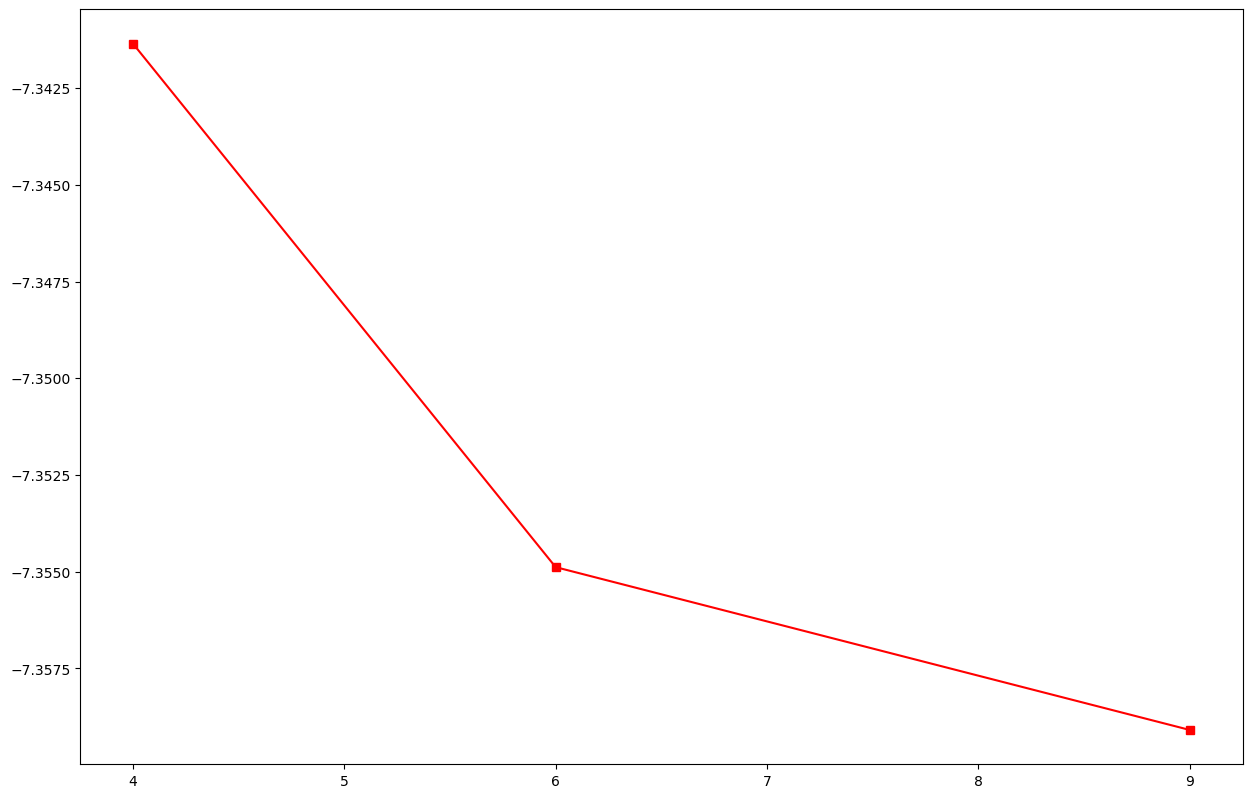

In [11]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

topic_numbers = [4,6,9]
Perplexity = [-7.3413499242914275,-7.35488162453547, -7.359089732193783]

plt.figure(figsize=(15,10),dpi=100,linewidth = 2)

plt.plot(topic_numbers,Perplexity,'s-',color = 'r', label="TSMC")

#選取主題數6

In [12]:
import pyLDAvis
import pyLDAvis.gensim #import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
pyLDAvis.enable_notebook
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dict, doc_topic_dist=None)
"""
参数说明：
prepare(topic_model, corpus, dictionary, doc_topic_dist=None)
topic_model：训练得到的 gensim LdaModel 对象，不支持其他 gensim 模型类型
corpus：以词袋形式表示的语料（用于训练主题模型的语料）
dictionary：用于构建词袋模型的字典，即 gensim Dictionary 对象
doc_topic_dist：可选参数，用于传入 LDA 模型的文档主题分布，默认取值为 None，当需要多次调用 prepare 函数时，可以传入该参数
"""
pyLDAvis.display(vis)


#λ接近1，則主題的字詞將較頻繁出現，λ接近0，則會有比較多獨特的字

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


將主題分成6個

In [14]:
corpus_c = chen['jieba_results'].values.tolist() 

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  

c_vectorizer = CountVectorizer()  # 計算單字出現在文件中的次數
c_X = c_vectorizer.fit_transform(corpus_c) #  inputmust be a list, return a matrix (#of corpus) x (# of word) # 201 x 4835
word = c_vectorizer.get_feature_names() # column name which is the word
message_column = word

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  # 計算tfidf

c_transformer = TfidfTransformer()  
c_tfidf = c_transformer.fit_transform(c_X) # X : corpus x word matrix, output:201 x 4835

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# #使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation

c_LDA = LatentDirichletAllocation(n_components=6, random_state=None)
c_LDA.fit(c_X) # 用countrvectorizer() result 去fit 

topic_chen = list()
#觀看結果
for i,topic in enumerate(c_LDA.components_):
    print(f"TOP 20 WORDS PER TOPIC #{i}")
    c_topic = [c_vectorizer.get_feature_names()[index] for index in topic.argsort()[-20:]]
    print(c_topic)
    for i in c_topic:
        topic_chen.append(i)

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TOP 20 WORDS PER TOPIC #0
['人員', '高雄市', '麗珍', '可以', '非常', '如果', '就是', '部分', '這個', '一個', '因為', '工作', '這些', '一些', '所以', '他們', '現在', '局長', '議員', '我們']
TOP 20 WORDS PER TOPIC #1
['一些', '地方', '能夠', '很多', '楠梓', '民眾', '麗珍', '希望', '非常', '沒有', '如果', '所以', '因為', '這個', '可以', '一個', '議員', '現在', '局長', '我們']
TOP 20 WORDS PER TOPIC #2
['預算', '東門路', '長青', '社會局', '好市', '認為', '活動中心', '就業', '北區', '高雄', '市民', '園道', '招商', '高雄市', '投資', '市政府', '老人', '鐵路', '市長', '我們']
TOP 20 WORDS PER TOPIC #3
['麗珍', '但是', '就是', '能夠', '所以', '教育局', '如果', '問題', '因為', '這樣', '學校', '他們', '沒有', '可以', '一個', '這個', '現在', '議員', '局長', '我們']
TOP 20 WORDS PER TOPIC #4
['新台', '新莊', '中港', '教育局', '發包', '運動', '山里', '工程', '一座', '能夠', '公里', '開闢', '翠華', '以後', '規劃', '鐵路', '未來', '地下', '市民', '左營']
TOP 20 WORDS PER TOPIC #5
['高雄市', '建議', '議員', '因為', '這是', '入殮', '他們', '規劃', '就是', '孔廟', '很多', '非常', '左營', '現在', '觀光', '一個', '這裡', '可以', '蓮池', '我們']


In [17]:
c_LDA.fit(c_tfidf) # 用tfidf result 去fit 

#觀看結果
for i,topic in enumerate(c_LDA.components_):
    print(f"TOP 20 WORDS PER TOPIC #{i}")
    print([c_vectorizer.get_feature_names()[index] for index in topic.argsort()[-20:]])

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TOP 20 WORDS PER TOPIC #0
['一些', '市長', '能夠', '希望', '沒有', '楠梓', '規劃', '如果', '非常', '很多', '他們', '所以', '因為', '這個', '一個', '可以', '現在', '議員', '局長', '我們']
TOP 20 WORDS PER TOPIC #1
['帳戶', '財富', '存款', '募集', '提撥', '認證', '可行', '可行性', '油煙', '匝道', '擴建', '提送', '八德', '耕作', '一家', '電影', '脫貧', '蔬菜', '高公局', '電影院']
TOP 20 WORDS PER TOPIC #2
['發言', '強行', '洪秀', '血脂高', '幾十年', '七成', '各大', '對外', '停止', '醫師', '琦莉', '健保局', '呈現', '看病', '掛號', '今年初', '看診', '資本額', '下降', '門診']
TOP 20 WORDS PER TOPIC #3
['竊盜', '防颱', '沙包', '抽水站', '來襲', '取締', '有所作為', '水對', '階段性', '皮革', '如強', '去取', '計程車', '企劃', '油垢', '油煙', '防災', '輪椅', '破案率', '變電']
TOP 20 WORDS PER TOPIC #4
['票證', '規費', '刷卡', '渡輪', '國光', '相較', '持有', '萬張', '率會', '周遭', '清溝', '加蓋', '有多廣', '優惠', '悠遊', '統聯', '多廣', '不雅觀', '曹公', '一卡通']
TOP 20 WORDS PER TOPIC #5
['如強', '去取', '污染', '衣服', '儲值卡', '評鑑', '瓶子', '工隊', '自動', '萬個', '挨罵', '回收機', '寶特瓶', '取締', '志工', '表揚', '從小', '養成', '回收', '八條']


In [18]:
for i in topic_chen:
#for i in topic_:# 文章內容的topic所有字的總表
    print(i,end = ', ')

人員, 高雄市, 麗珍, 可以, 非常, 如果, 就是, 部分, 這個, 一個, 因為, 工作, 這些, 一些, 所以, 他們, 現在, 局長, 議員, 我們, 一些, 地方, 能夠, 很多, 楠梓, 民眾, 麗珍, 希望, 非常, 沒有, 如果, 所以, 因為, 這個, 可以, 一個, 議員, 現在, 局長, 我們, 預算, 東門路, 長青, 社會局, 好市, 認為, 活動中心, 就業, 北區, 高雄, 市民, 園道, 招商, 高雄市, 投資, 市政府, 老人, 鐵路, 市長, 我們, 麗珍, 但是, 就是, 能夠, 所以, 教育局, 如果, 問題, 因為, 這樣, 學校, 他們, 沒有, 可以, 一個, 這個, 現在, 議員, 局長, 我們, 新台, 新莊, 中港, 教育局, 發包, 運動, 山里, 工程, 一座, 能夠, 公里, 開闢, 翠華, 以後, 規劃, 鐵路, 未來, 地下, 市民, 左營, 高雄市, 建議, 議員, 因為, 這是, 入殮, 他們, 規劃, 就是, 孔廟, 很多, 非常, 左營, 現在, 觀光, 一個, 這裡, 可以, 蓮池, 我們, 

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


陳麗珍政見:
一、督促市府城市行銷，振興經濟留住人才，市府任內不任意舉債；拓展就業及進修管道，重視勞工權益、青年創業基金。
二、推動環保，改善空氣汙染；因應氣候變遷，生活減塑，節能減碳；推動綠能交通、綠能產業，打造健康居住環境。
三、持續爭取蓮潭文化園區，串連舊城古蹟、見城計畫、半屏山，結合左營舊部落，發展高鐵站商圈，創造在地文化觀光。
四、督促市府於鐵路地下化完工後，綠廊道規劃及各車站文化特色設計，晉升國際最具特色的綠園道。
五、爭取改造後勁溪畔，成為市民休憩運動親水生態公園；爭取楠梓交通轉運站、楠梓運動中心、推動楠梓大學城，打造左楠優質生活。
六、爭取教育軟硬體設備，擴充圖書分館、藏書，培養閱讀；推廣品德教育及英語教學向下扎根。
七、廣設公托注重幼兒教育，爭取教育津貼，減輕家長負擔，解決少子化問題。
八、落實長照福利政策、重視長輩照顧服務，關懷弱勢，爭取新居民、婦女福利。
九、督促新台十七線建設，德民路至左營大路南門段儘速完成，帶動左楠交通發展。
十、督促國道十號由高鐵站及翠華路銜接國1北上匝道建設儘速完成，解決左營交通壅塞。
十一、維護治安，爭取監控系統，提升警消裝備，保障市民安全。
十二、爭取合群新村、果貿、翠華國宅公共設施，住宅社區環境維護，提升居民生活品質。
十三、推動「路平專案印，破損柏油路刨除重鋪；左營區瀝青廠儘速遷移，改造為多功能活動園區；加強排水設施、維護人行道、行道樹、特色公園改造、無障礙設施。

In [20]:
politics_chen = "一、督促市府城市行銷，振興經濟留住人才，市府任內不任意舉債；拓展就業及進修管道，重視勞工權益、青年創業基金。二、推動環保，改善空氣汙染；因應氣候變遷，生活減塑，節能減碳；推動綠能交通、綠能產業，打造健康居住環境。三、持續爭取蓮潭文化園區，串連舊城古蹟、見城計畫、半屏山，結合左營舊部落，發展高鐵站商圈，創造在地文化觀光。四、督促市府於鐵路地下化完工後，綠廊道規劃及各車站文化特色設計，晉升國際最具特色的綠園道。五、爭取改造後勁溪畔，成為市民休憩運動親水生態公園；爭取楠梓交通轉運站、楠梓運動中心、推動楠梓大學城，打造左楠優質生活。六、爭取教育軟硬體設備，擴充圖書分館、藏書，培養閱讀；推廣品德教育及英語教學向下扎根。七、廣設公托注重幼兒教育，爭取教育津貼，減輕家長負擔，解決少子化問題。八、落實長照福利政策、重視長輩照顧服務，關懷弱勢，爭取新居民、婦女福利。九、督促新台十七線建設，德民路至左營大路南門段儘速完成，帶動左楠交通發展。十、督促國道十號由高鐵站及翠華路銜接國1北上匝道建設儘速完成，解決左營交通壅塞。十一、維護治安，爭取監控系統，提升警消裝備，保障市民安全。十二、爭取合群新村、果貿、翠華國宅公共設施，住宅社區環境維護，提升居民生活品質。十三、推動「路平專案印，破損柏油路刨除重鋪；左營區瀝青廠儘速遷移，改造為多功能活動園區；加強排水設施、維護人行道、行道樹、特色公園改造、無障礙設施。"

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("../Lab/KCC Data/Dict/KccDict2020.txt")
jieba.set_dictionary("../Lab/KCC Data/Dict/dict.big.txt")

punctuation = "、，：:""()\ 。 n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

politics_words_chen = jieba.lcut(politics_chen  , cut_all = False)
politics_words_chen

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:7: DeprecationWarning: invalid escape sequence \ 
<>:7: DeprecationWarning: invalid escape sequence \ 
<ipython-input-21-d5d5f585ec99>:7: DeprecationWarning: invalid escape sequence \ 
  punctuation = "、，：:""()\ 。 n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\CHINGT~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.631 seconds.
Prefix dict has been built successfully.
Building prefix dict from C:\Users\CHING TING\Desktop\NSYSU1092\Lab\KCC Data\Dict\dict.big.txt ...
Loading model from cache C:\Users\CHINGT~

['一',
 '、',
 '督促',
 '市府',
 '城市',
 '行銷',
 '，',
 '振興',
 '經濟',
 '留住',
 '人才',
 '，',
 '市府',
 '任內',
 '不',
 '任意',
 '舉債',
 '；',
 '拓展',
 '就業',
 '及',
 '進修',
 '管道',
 '，',
 '重視',
 '勞工',
 '權益',
 '、',
 '青年',
 '創業基金',
 '。',
 '二',
 '、',
 '推動',
 '環保',
 '，',
 '改善',
 '空氣',
 '汙染',
 '；',
 '因應',
 '氣候變遷',
 '，',
 '生活',
 '減塑',
 '，',
 '節能',
 '減碳',
 '；',
 '推動',
 '綠能',
 '交通',
 '、',
 '綠能',
 '產業',
 '，',
 '打造',
 '健康',
 '居住',
 '環境',
 '。',
 '三',
 '、',
 '持續',
 '爭取',
 '蓮潭',
 '文化',
 '園區',
 '，',
 '串連',
 '舊城',
 '古',
 '蹟',
 '、',
 '見',
 '城計畫',
 '、',
 '半屏山',
 '，',
 '結合',
 '左營',
 '舊',
 '部落',
 '，',
 '發展',
 '高鐵',
 '站',
 '商圈',
 '，',
 '創造',
 '在',
 '地',
 '文化',
 '觀光',
 '。',
 '四',
 '、',
 '督促',
 '市府',
 '於',
 '鐵路',
 '地下',
 '化',
 '完工後',
 '，',
 '綠廊',
 '道',
 '規劃',
 '及',
 '各',
 '車站',
 '文化',
 '特色',
 '設計',
 '，',
 '晉升',
 '國際',
 '最具',
 '特色',
 '的',
 '綠園',
 '道',
 '。',
 '五',
 '、',
 '爭取',
 '改造',
 '後勁',
 '溪畔',
 '，',
 '成為',
 '市民',
 '休憩',
 '運動',
 '親水',
 '生態',
 '公園',
 '；',
 '爭取',
 '楠梓',
 '交通',
 '轉運站',
 '、',
 '楠梓',
 '運動',
 '中心',
 '、',
 '推動',
 '楠梓',
 '大

In [23]:
# 政見做tfidf
c_vectorizer = CountVectorizer()  
c_X = c_vectorizer.fit_transform(politics_words_chen)  
word = c_vectorizer.get_feature_names() 
c_transformer = TfidfTransformer()  
c_tfidf = c_transformer.fit_transform(c_X) #143 word in 

c_LDA = LatentDirichletAllocation(n_components=6, random_state=None)

#政見做LDA
c_LDA.fit(c_tfidf)
c_topic_politics = list()
#觀看結果
for i,topic in enumerate(c_LDA.components_):
    print(f"TOP 20 WORDS PER TOPIC #{i}")
    topic_c = [c_vectorizer.get_feature_names()[index] for index in topic.argsort()[-20:]]
    print(topic_c)
    for i in topic_c:
        c_topic_politics.append(i)


TOP 20 WORDS PER TOPIC #0
['多功能', '中心', '軟硬', '減碳', '任內', '就業', '果貿', '英語教學', '居住', '城計畫', '減塑', '銜接', '部落', '休憩', '圖書', '公托', '勞工', '公園', '左營', '推動']
TOP 20 WORDS PER TOPIC #1
['十七', '舉債', '十一', '排水', '商圈', '轉運站', '幼兒教育', '服務', '問題', '保障', '照顧', '大學城', '活動', '空氣', '解決', '福利', '居民', '重視', '維護', '市府']
TOP 20 WORDS PER TOPIC #2
['國道', '無障礙', '壅塞', '優質', '觀光', '舊城', '系統', '留住', '綠廊', '創造', '親水', '經濟', '晉升', '發展', '教育', '高鐵', '提升', '綠能', '環境', '特色']
TOP 20 WORDS PER TOPIC #3
['警消', '婦女', '品德教育', '人才', '管道', '蓮潭', '刨除', '設計', '北上', '左營區', '綠園', '生活品質', '城市', '十三', '新台', '打造', '設施', '改造', '楠梓', '交通']
TOP 20 WORDS PER TOPIC #4
['家長', '落實', '柏油路', '地下', '行道樹', '產業', '公共設施', '國宅', '鐵路', '權益', '破損', '完工後', '大路', '結合', '任意', '生活', '建設', '左楠', '文化', '爭取']
TOP 20 WORDS PER TOPIC #5
['創業基金', '南門', '長輩', '後勁', '擴充', '少子', '政策', '關懷', '治安', '注重', '溪畔', '青年', '加強', '德民路', '翠華', '完成', '市民', '運動', '園區', '督促']


C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# #政見所有topic 總表
for i in c_topic_politics:
#for i in topic_:# 文章內容的topic所有字的總表
    print(i,end = ', ')

多功能, 中心, 軟硬, 減碳, 任內, 就業, 果貿, 英語教學, 居住, 城計畫, 減塑, 銜接, 部落, 休憩, 圖書, 公托, 勞工, 公園, 左營, 推動, 十七, 舉債, 十一, 排水, 商圈, 轉運站, 幼兒教育, 服務, 問題, 保障, 照顧, 大學城, 活動, 空氣, 解決, 福利, 居民, 重視, 維護, 市府, 國道, 無障礙, 壅塞, 優質, 觀光, 舊城, 系統, 留住, 綠廊, 創造, 親水, 經濟, 晉升, 發展, 教育, 高鐵, 提升, 綠能, 環境, 特色, 警消, 婦女, 品德教育, 人才, 管道, 蓮潭, 刨除, 設計, 北上, 左營區, 綠園, 生活品質, 城市, 十三, 新台, 打造, 設施, 改造, 楠梓, 交通, 家長, 落實, 柏油路, 地下, 行道樹, 產業, 公共設施, 國宅, 鐵路, 權益, 破損, 完工後, 大路, 結合, 任意, 生活, 建設, 左楠, 文化, 爭取, 創業基金, 南門, 長輩, 後勁, 擴充, 少子, 政策, 關懷, 治安, 注重, 溪畔, 青年, 加強, 德民路, 翠華, 完成, 市民, 運動, 園區, 督促, 

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
match_column_chen = list(set(politics_words_chen).intersection(c_vectorizer.get_feature_names()))
match_column_chen

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['遷移',
 '十三',
 '勞工',
 '北上',
 '福利',
 '高鐵',
 '重視',
 '督促',
 '行道樹',
 '幼兒教育',
 '津貼',
 '十二',
 '大路',
 '優質',
 '半屏山',
 '南門',
 '因應',
 '安全',
 '活動',
 '合群',
 '最具',
 '推動',
 '改造',
 '無障礙',
 '車站',
 '節能',
 '管道',
 '系統',
 '破損',
 '擴充',
 '運動',
 '十七',
 '新台',
 '中心',
 '溪畔',
 '親水',
 '綠能',
 '文化',
 '綠廊',
 '串連',
 '城計畫',
 '警消',
 '匝道',
 '軟硬',
 '拓展',
 '治安',
 '轉運站',
 '設計',
 '新村',
 '閱讀',
 '休憩',
 '照顧',
 '結合',
 '柏油路',
 '少子',
 '弱勢',
 '左營',
 '舊城',
 '規劃',
 '負擔',
 '創業基金',
 '就業',
 '環保',
 '大學城',
 '居住',
 '建設',
 '商圈',
 '果貿',
 '政策',
 '減塑',
 '培養',
 '廣設',
 '分館',
 '留住',
 '社區',
 '瀝青廠',
 '後勁',
 '生活',
 '權益',
 '公園',
 '交通',
 '鐵路',
 '公共設施',
 '持續',
 '左楠',
 '婦女',
 '翠華',
 '改善',
 '部落',
 '德民路',
 '服務',
 '減輕',
 '英語教學',
 '舉債',
 '減碳',
 '人才',
 '解決',
 '國宅',
 '設備',
 '扎根',
 '住宅',
 '創造',
 '城市',
 '人行道',
 '空氣',
 '裝備',
 '爭取',
 '觀光',
 '任意',
 '完工後',
 '家長',
 '居民',
 '長輩',
 '設施',
 '國道',
 '汙染',
 '生態',
 '產業',
 '發展',
 '蓮潭',
 '銜接',
 '維護',
 '市府',
 '加強',
 '市民',
 '青年',
 '圖書',
 '推廣',
 '十號',
 '健康',
 '地下',
 '壅塞',
 '重鋪',
 '綠園',
 '晉升',
 '楠梓',
 '環境',
 '向下',
 '成為',
 '專案',
 

In [26]:
document_term_chen = pd.DataFrame(c_X.toarray(), columns = c_vectorizer.get_feature_names())
document_term_chen

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,中心,串連,交通,人才,人行道,任內,任意,休憩,住宅,保障,...,部落,重視,重鋪,銜接,鐵路,長輩,閱讀,關懷,青年,高鐵
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
match_document_politics_chen = document_term_chen[match_column_chen]
match_document_politics_chen

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,遷移,十三,勞工,北上,福利,高鐵,重視,督促,行道樹,幼兒教育,...,注重,生活品質,落實,進修,排水,打造,品德教育,帶動,任內,公托
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
match_document_politics_chen["sum"] = match_document_politics_chen.sum(axis=1)
match_document_politics_chen

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-28-1f72bd2975f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_document_politics_chen["sum"] = match_document_politics_chen.sum(axis=1)


,遷移,十三,勞工,北上,福利,高鐵,重視,督促,行道樹,幼兒教育,...,生活品質,落實,進修,排水,打造,品德教育,帶動,任內,公托,sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
sum(match_document_politics_chen['sum'].tolist()) / len(match_column_chen) /len(chen) # 陳麗珍質詢內容與政見整體相關度

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.01009128021650383